<a href="https://colab.research.google.com/github/rahul-tc/Data-Analysis-Project/blob/main/Rahul_HeritageFabrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**HeritageFabrics** has provided you with its budget data and actual expense transaction for the months January and February in the below link:

 Budget url:-https://raw.githubusercontent.com/Invact-Abhay/DOE/refs/heads/main/HeritageFabrics-Budget.csv

 Actual url:-https://raw.githubusercontent.com/Invact-Abhay/DOE/refs/heads/main/HeritageFabrics-Actual.csv

 The manager has asked you to perform a variance analysis for the given period.

# **PF4.1**

***Task 1: Import Pandas and matplotlib Library.***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

***Task 2: Create a DataFrame named 'Budget' and 'Actual from the given URL and then print the first 5 rows using head() function.***

In [2]:
Budget = pd.read_csv('https://raw.githubusercontent.com/Invact-Abhay/DOE/refs/heads/main/HeritageFabrics-Budget.csv')
Actual = pd.read_csv('https://raw.githubusercontent.com/Invact-Abhay/DOE/refs/heads/main/HeritageFabrics-Actual.csv')
print(Budget.head())
print(Actual.head())

     Month     Office     Category  Budget Amount
0  January  Bengaluru         Rent         255000
1  January  Bengaluru       Salary         363173
2  January  Bengaluru  Maintenance         595780
3  January  Bengaluru  Advertising         250113
4  January  Hyderabad         Rent         255000
         Date    Month     Office     Category  Transaction Amount
0  01/12/2024  January  Bengaluru       Salary               91286
1  01/13/2024  January  Bengaluru  Advertising              205469
2  01/13/2024  January  Hyderabad       Salary               14604
3  01/14/2024  January     Mumbai       Salary              143891
4  01/15/2024  January  Bengaluru       Salary              126794


***Task 3: Print the column headers of the budget and actual data.***

In [3]:
print(Budget.columns)
print(Actual.columns)

Index(['Month', 'Office', 'Category', 'Budget Amount'], dtype='object')
Index(['Date', 'Month', 'Office', 'Category', 'Transaction Amount'], dtype='object')


***Task 4: Convert the column headers of the budget and actual data to lowercase.***

In [5]:
Budget.columns = Budget.columns.str.lower()
Actual.columns = Actual.columns.str.lower()
print(Budget.columns)
print(Actual.columns)

Index(['month', 'office', 'category', 'budget amount'], dtype='object')
Index(['date', 'month', 'office', 'category', 'transaction amount'], dtype='object')


***Task 5: Replace any spaces in the column headers of the budget and actual data with underscores(_).***

In [6]:
Budget.columns = Budget.columns.str.replace(' ', '_')
Actual.columns = Actual.columns.str.replace(' ', '_')
print(Budget.columns)
print(Actual.columns)

Index(['month', 'office', 'category', 'budget_amount'], dtype='object')
Index(['date', 'month', 'office', 'category', 'transaction_amount'], dtype='object')


# **PF4.2**

***Task 6: Group the actual data by month, office, and category, and calculate the total transaction amount for each group.***

In [8]:
Actual_grouped = Actual.groupby(['month', 'office', 'category'])['transaction_amount'].sum().reset_index()
Actual_grouped

,month,office,category,transaction_amount
0,February,Bengaluru,Advertising,52365
1,February,Bengaluru,Maintenance,1228040
2,February,Bengaluru,Rent,150000
3,February,Bengaluru,Salary,175457
4,February,Hyderabad,Advertising,60000
5,February,Hyderabad,Maintenance,1380672
6,February,Hyderabad,Rent,105500
7,February,Hyderabad,Salary,295500
8,February,Mumbai,Advertising,63350
9,February,Mumbai,Maintenance,982708


***Task 7: Merge the Budget Data with the grouped Actual data to create a consolidated dataset.***

In [18]:
merged_data = pd.merge(Budget, Actual_grouped, on=['month', 'office', 'category'], how='left')
merged_data

,month,office,category,budget_amount,transaction_amount
0,January,Bengaluru,Rent,255000,141562
1,January,Bengaluru,Salary,363173,218080
2,January,Bengaluru,Maintenance,595780,175199
3,January,Bengaluru,Advertising,250113,205469
4,January,Hyderabad,Rent,255000,104187
5,January,Hyderabad,Salary,362336,84996
6,January,Hyderabad,Maintenance,159378,395290
7,January,Hyderabad,Advertising,55914,43561
8,January,Mumbai,Rent,255000,89897
9,January,Mumbai,Salary,466478,242849


***Task 8: Convert month names in the merged dataset to their corresponding numeric values using a mapping dictionary.***

In [20]:
monthmapping = {'January': 1, 'February': 2}
merged_data['month_number'] = merged_data['month'].map(monthmapping)
merged_data

,month,office,category,budget_amount,transaction_amount,month_number
0,January,Bengaluru,Rent,255000,141562,1
1,January,Bengaluru,Salary,363173,218080,1
2,January,Bengaluru,Maintenance,595780,175199,1
3,January,Bengaluru,Advertising,250113,205469,1
4,January,Hyderabad,Rent,255000,104187,1
5,January,Hyderabad,Salary,362336,84996,1
6,January,Hyderabad,Maintenance,159378,395290,1
7,January,Hyderabad,Advertising,55914,43561,1
8,January,Mumbai,Rent,255000,89897,1
9,January,Mumbai,Salary,466478,242849,1


***Task 9:  Compute the variance between the budgeted amount and the actual transaction amount in the merged dataset.***

In [23]:
merged_data['variance'] = merged_data['budget_amount'] - merged_data['transaction_amount']
merged_data.head()

,month,office,category,budget_amount,transaction_amount,month_number,variance
0,January,Bengaluru,Rent,255000,141562,1,113438
1,January,Bengaluru,Salary,363173,218080,1,145093
2,January,Bengaluru,Maintenance,595780,175199,1,420581
3,January,Bengaluru,Advertising,250113,205469,1,44644
4,January,Hyderabad,Rent,255000,104187,1,150813


# **PF4.3**

***Task 10: Perform an office-wise variance analysis using groupby.***

In [24]:
officewise_variance = merged_data.groupby('office')['variance'].sum().reset_index()
officewise_variance

,office,variance
0,Bengaluru,746874
1,Hyderabad,-116081
2,Mumbai,506216


***Task 11: Visualize the office-wise variance using a bar chart.***

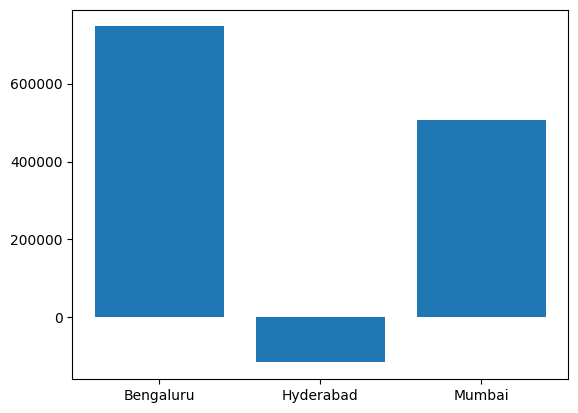

In [25]:
plt.bar(x=officewise_variance['office'],height=officewise_variance['variance'])
plt.show()

***Task 12: Create a bar chart to display the office-wise variance.***

***Label the x-axis as "Office".***

***Label the y-axis as "Variance".***

***Title the chart as "Office-wise Variance Analysis".***

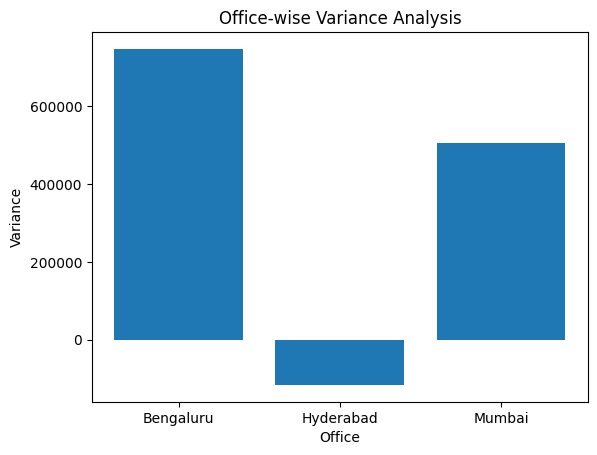

In [26]:
plt.bar(x=officewise_variance['office'],height=officewise_variance['variance'])
plt.xlabel('Office')
plt.ylabel('Variance')
plt.title('Office-wise Variance Analysis')
plt.show()

***Task 13:  Perform the monthly variance analysis using groupby.***

In [27]:
monthwise_variance = merged_data.groupby(['month','month_number'])['variance'].sum().reset_index()
monthwise_variance = monthwise_variance.sort_values('month_number',ascending = True)
monthwise_variance

,month,month_number,variance
1,January,1,1355802
0,February,2,-218793


***Task 14: Visualize the monthly variance using a bar chart.***

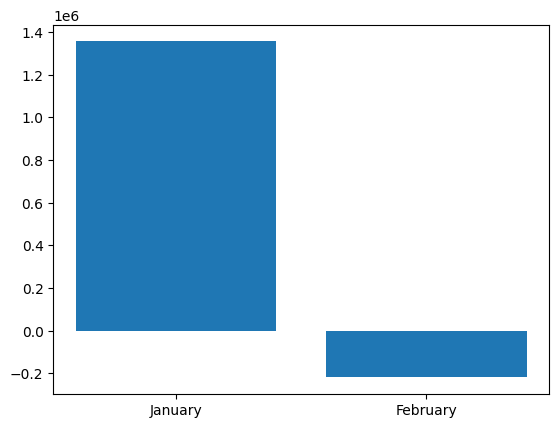

In [28]:
plt.bar(x=monthwise_variance['month'],height=monthwise_variance['variance'])
plt.show()

***Task 15: Create a bar chart to represent the monthly variance.***

***Label the x-axis as "Month".***

***Label the y-axis as "Variance (in millions)".***

***Title the chart as "Monthly Variance".***


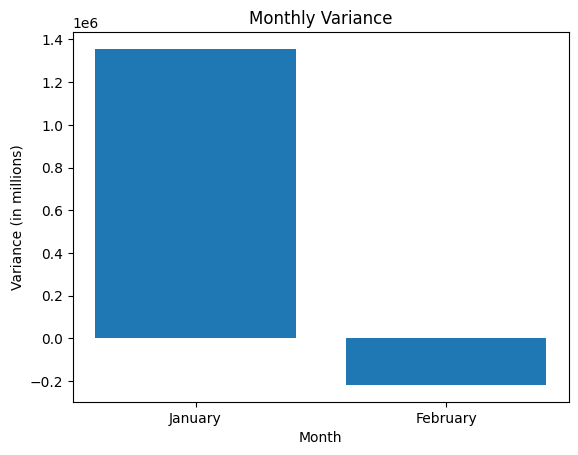

In [29]:
plt.bar(x=monthwise_variance['month'],height=monthwise_variance['variance'])
plt.xlabel('Month')
plt.ylabel('Variance (in millions)')
plt.title('Monthly Variance')
plt.show()